# In-Class Quiz Nº 4

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: Gonçalo Fonseca    
## Number: 50185

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q4.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve

from time import time

<hr style="border:2px solid black"> </hr>

# Data: Cats and Dogs dataset (small version) - zip file $\texttt{CatsDogsSmall.zip}$
## This file is divided into two directories (train and test)
## Each one has two sub-directories (dogs and cats)
## The training data consists of a 1000 images of cats and 1000 images of dogs
## The test data consists of 500 images of cats and 500 images of dogs
## The images have various sizes

# Questions:
# Consider that  we want to use transfer learning to build a CNN to perform a binary classification of the images (either a cat or a dog). Additionally with want to use data augmentation during the training process. 
# Note that you should be aware of the computational capacity of your system.  Choose the pre-trained network and parameter values such as the input image size or batch training size accordingly.
## 1.  Pick a pre-trained network of your choice and incorporate it in a CNN to tackle this problem. Build and compile the CNN. 
## 2.  Using the $\texttt{ImageDataGenerator}$ from Keras, build two generators (one for training and the other for testing). Note that the training generator has to include data augmentation. Pick one image of a dog and one image of a cat. Show these two original images and five versions of each image with data augmentation.
## 3.  Train the network for at least 10 epochs and show the results. Also include the test data as the validation set during training. Make sure to set the $\texttt{steps\_per\_epoch}$ and the $\texttt{validation\_steps}$ so that each training epoch runs through the all the training and test images. Show the evolution of the accuracies and the losses during training and print the number of errors and the confusion matrix for the test data.
## 4. Find the operational point of the classifier in Question 3. Calibrate the classifier in order to have approximately the same number of false positives an false negatives. Plot the ROC curve of this classifier with the test data. Include in this plot the operational points of the classifier before and after calibration

In [2]:
# load cats and dogs small dataset
db_dir = 'CatsDogsSmall'
train_dir = db_dir + '/train'
test_dir = db_dir + '/test'


## 1.

In [3]:
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator

input_shape = (128, 128, 3)

cnn_base = MobileNetV2(weights='imagenet',  include_top=False,  input_shape=input_shape)
cnn_cats_dogs = keras.models.Sequential()
cnn_cats_dogs.add(cnn_base)
cnn_cats_dogs.add(keras.layers.Flatten())
cnn_cats_dogs.add(keras.layers.Dense(2, activation='softmax'))
cnn_cats_dogs.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])



Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-06-01 19:35:13.065422: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-01 19:35:13.065572: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 2.

In [4]:
image_size = input_shape[:2]
batch_size = 100

data_gen_augm = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

data_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_gen = data_gen_augm.flow_from_directory(
    train_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical'
)

test_gen = data_gen.flow_from_directory(
    test_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


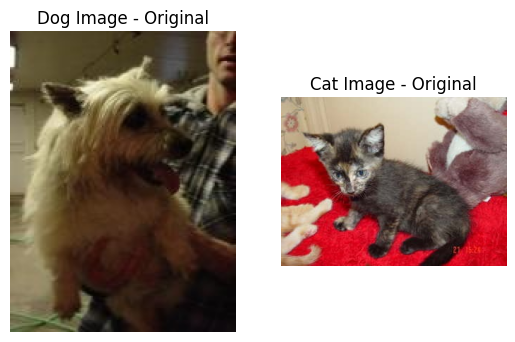

In [18]:

fig, axes = plt.subplots(1, 2)
axes[0].imshow(plt.imread("CatsDogsSmall/train/dogs/dog0009.jpg"))
axes[0].set_title('Dog Image - Original')
axes[0].axis('off')
axes[1].imshow(plt.imread("CatsDogsSmall/train/cats/cat0009.jpg"))
axes[1].set_title('Cat Image - Original')
axes[1].axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


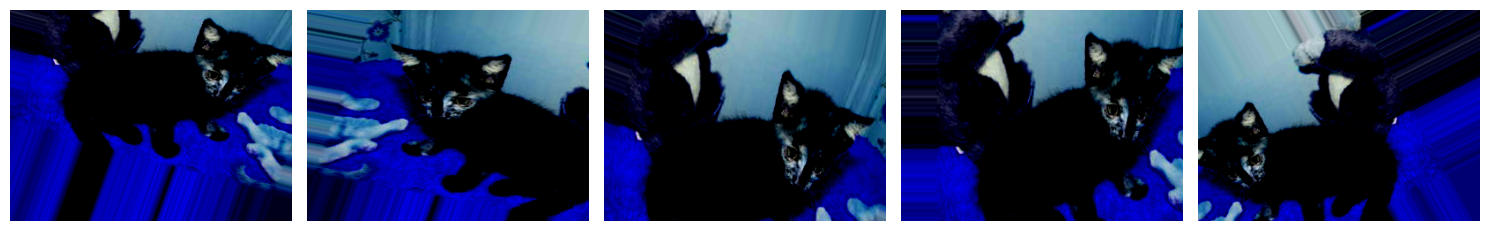

In [19]:
cat_gen = data_gen_augm.flow(np.array([plt.imread("CatsDogsSmall/train/cats/cat0009.jpg")]), batch_size=1)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(cat_gen.next().squeeze()[:, :, ::-1])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


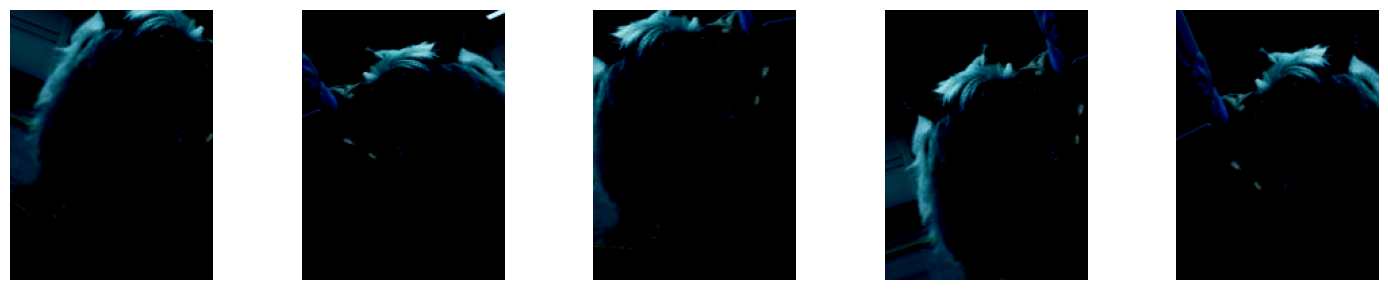

In [20]:
dog_gen = data_gen_augm.flow(np.array([plt.imread("CatsDogsSmall/train/dogs/dog0009.jpg")]), batch_size=1)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(dog_gen.next().squeeze()[:, :, ::-1])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 3.

In [5]:
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# best_model = keras.callbacks.ModelCheckpoint('best_model_cats_dogs.h5', monitor='val_loss', save_best_only=True)

cnn_cats_dogs_train = cnn_cats_dogs.fit(
    train_gen, steps_per_epoch=train_gen.n / batch_size, epochs=10, validation_data=test_gen, validation_steps=test_gen.n / batch_size
)

Epoch 1/10


2023-06-01 19:35:21.812969: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-01 19:35:28.978436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - ETA: 0s - loss: 0.7996 - accuracy: 0.8460

2023-06-01 19:36:26.693026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 71s 2s/step - loss: 0.7996 - accuracy: 0.8460 - val_loss: 0.4557 - val_accuracy: 0.9390
Epoch 2/10
20/20 [==============================] - 30s 1s/step - loss: 0.3070 - accuracy: 0.9065 - val_loss: 1.0687 - val_accuracy: 0.9410
Epoch 3/10
20/20 [==============================] - 23s 1s/step - loss: 0.1064 - accuracy: 0.9590 - val_loss: 2.4475 - val_accuracy: 0.9090
Epoch 4/10
20/20 [==============================] - 25s 1s/step - loss: 0.1057 - accuracy: 0.9665 - val_loss: 1.2246 - val_accuracy: 0.9480
Epoch 5/10
20/20 [==============================] - 24s 1s/step - loss: 0.0732 - accuracy: 0.9745 - val_loss: 2.1233 - val_accuracy: 0.8980
Epoch 6/10
20/20 [==============================] - 29s 1s/step - loss: 0.0743 - accuracy: 0.9700 - val_loss: 1.3142 - val_accuracy: 0.9280
Epoch 7/10
20/20 [==============================] - 25s 1s/step - loss: 0.0471 - accuracy: 0.9805 - val_loss: 1.8672 - val_accuracy: 0.9070
Epoch 8/10
20/20 [=============

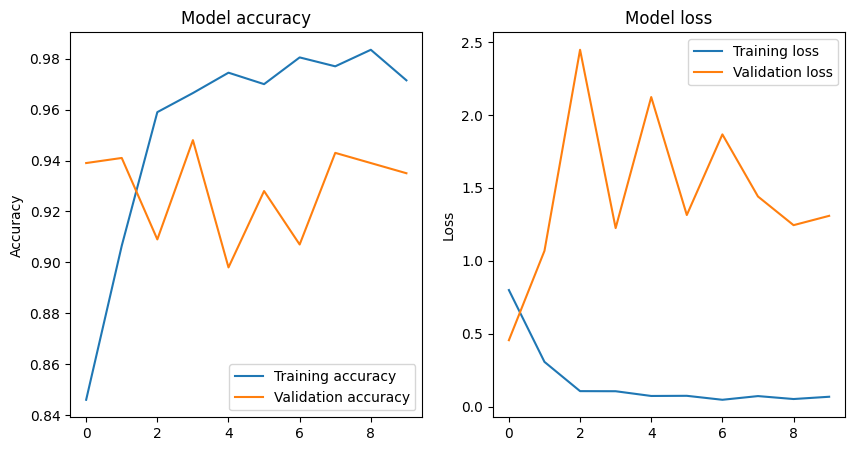

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(cnn_cats_dogs_train.history['accuracy'], label='Training accuracy')
plt.plot(cnn_cats_dogs_train.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(cnn_cats_dogs_train.history['loss'], label='Training loss')
plt.plot(cnn_cats_dogs_train.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')

plt.legend()
plt.show()

## 4.

2023-06-01 19:41:05.689323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 4s 263ms/step


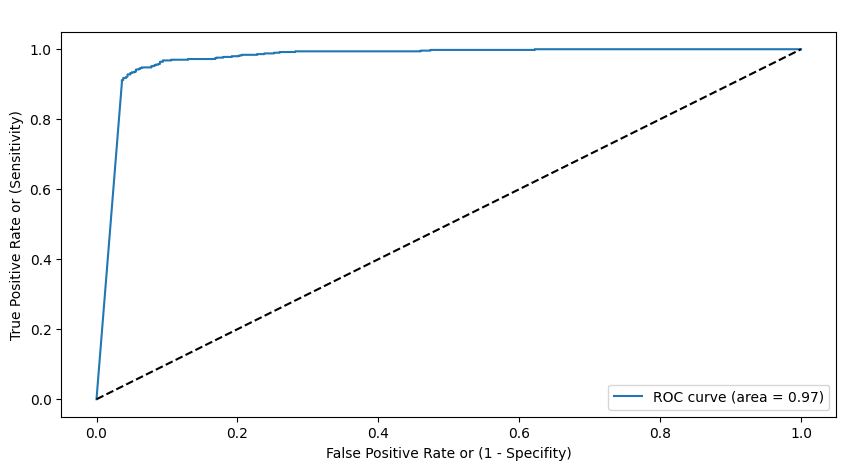

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = cnn_cats_dogs.predict(test_gen)
y_true = test_gen.classes
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:, 1])
auc = roc_auc_score(y_true, y_pred_prob[:, 1])

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title(' ')
plt.legend()
plt.show()




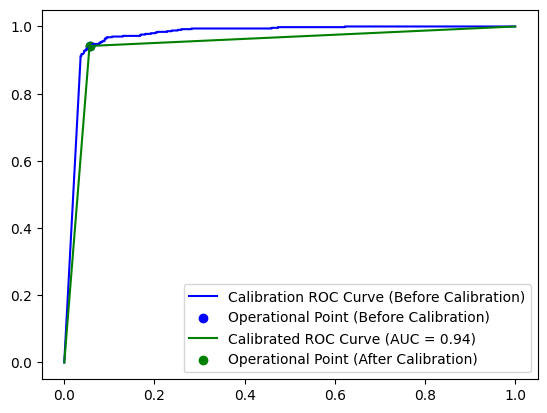

In [9]:
# Find the threshold that balances false positives and false negatives
threshold_operational = thresholds[np.argmax(tpr - fpr)]
y_pred_operational = (y_pred_prob[:, 1] >= threshold_operational).astype(int)
fpr_operational = fpr[np.argmax(tpr - fpr)]
tpr_operational = tpr[np.argmax(tpr - fpr)]
y_pred_calibrated = (y_pred_prob[:, 1] >= threshold_operational).astype(int)
fpr_calibrated, tpr_calibrated, thresholds_calibrated = roc_curve(y_true, y_pred_calibrated)
auc_score_calibrated = roc_auc_score(y_true, y_pred_calibrated)
plt.plot(fpr, tpr, label='Calibration ROC Curve (Before Calibration)', color='b')
plt.scatter(fpr_operational, tpr_operational, color='b', marker='o', label='Operational Point (Before Calibration)')
plt.plot(fpr_calibrated, tpr_calibrated, label='Calibrated ROC Curve (AUC = {:.2f})'.format(auc_score_calibrated), color='g')
plt.scatter(fpr_calibrated[np.argmax(tpr_calibrated - fpr_calibrated)],
            tpr_calibrated[np.argmax(tpr_calibrated - fpr_calibrated)],
            color='g', marker='o', label='Operational Point (After Calibration)')

plt.legend()
plt.show()

In [10]:
print("Operational Point (Before Calibration):")
print("False Positive Rate:", fpr_operational)
print("True Positive Rate:", tpr_operational)
print()


print("Operational Point (After Calibration):")
print("False Positive Rate:", fpr_calibrated[np.argmax(tpr_calibrated - fpr_calibrated)])
print("True Positive Rate:", tpr_calibrated[np.argmax(tpr_calibrated - fpr_calibrated)])

Operational Point (Before Calibration):
False Positive Rate: 0.056
True Positive Rate: 0.942

Operational Point (After Calibration):
False Positive Rate: 0.056
True Positive Rate: 0.942


In [14]:
import numpy as np
import pandas as pd
from sklearn import model_selection, metrics
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

def conf_matrix(y_true, y_pred):
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
    tnr = tn / (tn + fp)
    fpr = fp / (tn + fp)
    fnr = fn / (fn + tp)
    tpr = tp / (fn + tp)
    return pd.DataFrame(
        [[f'TN = {tn} (TNR = {tnr:1.2%})', f'FP = {fp} (FPR = {fpr:1.2%})'],
         [f'FN = {fn} (FNR = {fnr:1.2%})', f'TP = {tp} (TPR = {tpr:1.2%})']],
        index=['True 0', 'True 1'],
        columns=['Pred 0', 'Pred 1']
    )

y_pred_teste2 = cnn_cats_dogs.predict(test_gen)
y_pred_teste2 = np.argmax(y_pred_teste2, axis=1)  # Convert predicted probabilities to class labels

print(conf_matrix(y_true, y_pred_teste2))




10/10 [==============================] - 4s 402ms/step
                         Pred 0                   Pred 1
True 0  TN = 458 (TNR = 91.60%)    FP = 42 (FPR = 8.40%)
True 1    FN = 23 (FNR = 4.60%)  TP = 477 (TPR = 95.40%)


10/10 [==============================] - 3s 356ms/step
                         Pred 0                   Pred 1
True 0  TN = 472 (TNR = 94.40%)    FP = 28 (FPR = 5.60%)
True 1    FN = 29 (FNR = 5.80%)  TP = 471 (TPR = 94.20%)


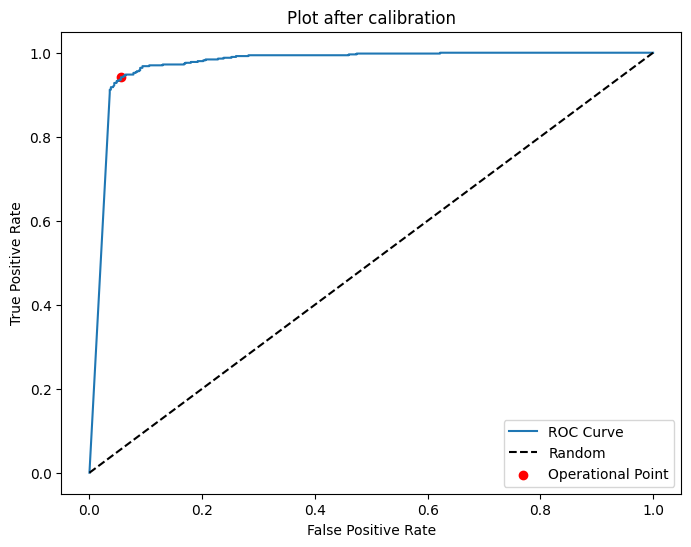

In [23]:
# Calculate predicted probabilities
y_pred = cnn_cats_dogs.predict(test_gen)
y_pred_prob = y_pred[:, 1]  # Use probabilities of positive class

# Compute false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_prob)

# Find the threshold that balances false positives and false negatives
threshold_operational = thresholds[np.argmax(tpr - fpr)]

# Compute the predicted labels based on the operational threshold
y_pred_calibrated = (y_pred_prob >= threshold_operational).astype(int)

# Compute confusion matrix and print
conf_matrix_calibrated = conf_matrix(y_true, y_pred_calibrated)
print(conf_matrix_calibrated)

# Plot the ROC curve with the operational point
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], color='r', marker='o', label='Operational Point')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Plot after calibration')
plt.legend()
plt.show()

10/10 [==============================] - 3s 303ms/step
Confusion matrix before calibration:
                         Pred 0                   Pred 1
True 0  TN = 472 (TNR = 94.40%)    FP = 28 (FPR = 5.60%)
True 1    FN = 29 (FNR = 5.80%)  TP = 471 (TPR = 94.20%)
Confusion matrix after calibration:
                         Pred 0                   Pred 1
True 0  TN = 459 (TNR = 91.80%)    FP = 41 (FPR = 8.20%)
True 1    FN = 23 (FNR = 4.60%)  TP = 477 (TPR = 95.40%)


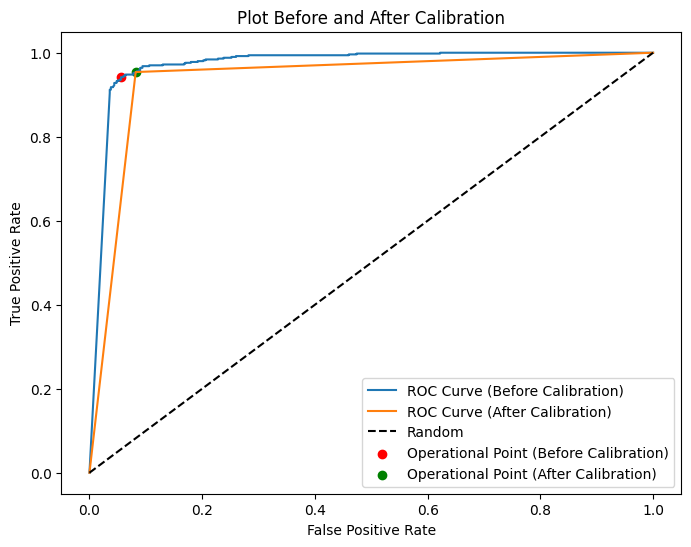

In [24]:
y_pred_prob_before = cnn_cats_dogs.predict(test_gen)
y_pred_prob_before = y_pred_prob_before[:, 1]  # Use probabilities of positive class

# Compute false positive rate and true positive rate for different thresholds before calibration
fpr_before, tpr_before, thresholds_before = metrics.roc_curve(y_true, y_pred_prob_before)

# Find the threshold that balances false positives and false negatives before calibration
threshold_operational_before = thresholds_before[np.argmax(tpr_before - fpr_before)]

# Compute the predicted labels based on the operational threshold before calibration
y_pred_calibrated_before = (y_pred_prob_before >= threshold_operational_before).astype(int)

# Compute confusion matrix before calibration and print
conf_matrix_calibrated_before = conf_matrix(y_true, y_pred_calibrated_before)
print("Confusion matrix before calibration:")
print(conf_matrix_calibrated_before)

# Calibrate the predicted probabilities
# Perform threshold calibration to balance false positives and false negatives
threshold_calibrated = (threshold_operational_before + 0.5) / 2  # Example calibration
y_pred_calibrated = (y_pred_prob_before >= threshold_calibrated).astype(int)

# Compute confusion matrix after calibration and print
conf_matrix_calibrated = conf_matrix(y_true, y_pred_calibrated)
print("Confusion matrix after calibration:")
print(conf_matrix_calibrated)

# Compute false positive rate and true positive rate for different thresholds after calibration
fpr_after, tpr_after, thresholds_after = metrics.roc_curve(y_true, y_pred_calibrated)

# Plot the ROC curve with the operational points before and after calibration
plt.figure(figsize=(8, 6))
plt.plot(fpr_before, tpr_before, label='ROC Curve (Before Calibration)')
plt.plot(fpr_after, tpr_after, label='ROC Curve (After Calibration)')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.scatter(fpr_before[np.argmax(tpr_before - fpr_before)], tpr_before[np.argmax(tpr_before - fpr_before)],
            color='r', marker='o', label='Operational Point (Before Calibration)')
plt.scatter(fpr_after[np.argmax(tpr_after - fpr_after)], tpr_after[np.argmax(tpr_after - fpr_after)],
            color='g', marker='o', label='Operational Point (After Calibration)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Plot Before and After Calibration')
plt.legend()
plt.show()